# Convolutional Neural Networks

In [96]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_error, r2_score
import math


In [97]:
# Define paths to training and testing datasets
train_dir = '/content/training_data' # folder has to be named 'testing_data'
test_dir = '/content/testing_data'

# Load the training and testing labels
train_labels = pd.read_csv('/content/training_data_values.csv')
test_labels = pd.read_csv('/content/testing_data_values.csv')

In [98]:
# Verify that the data has been loaded correctly
print("Training data example:")
print(train_labels.head())  # Print the first few rows of the training labels

print("\nTesting data example:")
print(test_labels.head())  # Print the first few rows of the testing labels

# Print specific values to show it worked
print("\nSpecific value from training data:")
print(train_labels.iloc[0])  # Print the first row of the training labels

print("\nSpecific value from testing data:")
print(test_labels.iloc[0])  # Print the first row of the testing labels

Training data example:
     filename  value
0  gauge1.png  120.0
1  gauge2.png    0.0
2  gauge3.png   60.0
3  gauge4.png   30.0
4  gauge5.png   80.0

Testing data example:
    filename  value
0  test1.png   27.5
1  test2.png   17.5
2  test3.png   62.5
3  test4.png   67.5
4  test5.png   40.0

Specific value from training data:
filename    gauge1.png
value            120.0
Name: 0, dtype: object

Specific value from testing data:
filename    test1.png
value            27.5
Name: 0, dtype: object


In [99]:
print(train_labels.head())  # Print the first few rows of the training labels
print(test_labels.head())  # Print the first few rows of the testing labels

     filename  value
0  gauge1.png  120.0
1  gauge2.png    0.0
2  gauge3.png   60.0
3  gauge4.png   30.0
4  gauge5.png   80.0
    filename  value
0  test1.png   27.5
1  test2.png   17.5
2  test3.png   62.5
3  test4.png   67.5
4  test5.png   40.0


In [100]:
# generates batches of tensor image data with real-time data augmentation
# rescale=1.0/255.0 rescales the pixel values of the images, the values are normalized to a range of 0 to 1
# 20% of the training data will be used for validation purposes
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [101]:
# Load training and validation data
train_generator = train_datagen.flow_from_dataframe( # generates batches of augmented/normalized data
    train_labels, # filenames
    directory=train_dir, # directory where the images are stored
    x_col='filename', # column in the DataFrame that contains the filenames fo the images
    y_col='value', # column in the DataFrame that contains the filenames of the images
    target_size=(128, 128), # size to which all images found will be resized
    class_mode='raw', # labels will be returned as they are without one-hot encoding
    subset='training'
)
print("\nValidated training filenames:")
print(train_generator.filenames)

validation_generator = train_datagen.flow_from_dataframe(
    train_labels,
    directory=train_dir,
    x_col='filename',
    y_col='value',
    target_size=(128, 128),
    class_mode='raw',
    subset='validation'
)

Found 20 validated image filenames.

Validated training filenames:
['gauge6.png', 'gauge7.png', 'gauge8.png', 'gauge9.png', 'gauge10.png', 'gauge11.png', 'gauge12.png', 'gauge13.png', 'gauge14.png', 'gauge15.png', 'gauge16.png', 'gauge17.png', 'gauge18.png', 'gauge19.png', 'gauge20.png', 'gauge21.png', 'gauge22.png', 'gauge23.png', 'gauge24.png', 'gauge25.png']
Found 5 validated image filenames.


In [102]:
# Load test data
print("\nLoading test data...")
test_generator = test_datagen.flow_from_dataframe(
    test_labels,
    directory=test_dir,
    x_col='filename',
    y_col='value',
    target_size=(128, 128),
    class_mode='raw',
    shuffle=False
)


Loading test data...
Found 10 validated image filenames.


In [103]:
# Print the filenames that were found
print("\nValidated training filenames:")
print(train_generator.filenames)

print("\nValidated validation filenames:")
print(validation_generator.filenames)


Validated training filenames:
['gauge6.png', 'gauge7.png', 'gauge8.png', 'gauge9.png', 'gauge10.png', 'gauge11.png', 'gauge12.png', 'gauge13.png', 'gauge14.png', 'gauge15.png', 'gauge16.png', 'gauge17.png', 'gauge18.png', 'gauge19.png', 'gauge20.png', 'gauge21.png', 'gauge22.png', 'gauge23.png', 'gauge24.png', 'gauge25.png']

Validated validation filenames:
['gauge1.png', 'gauge2.png', 'gauge3.png', 'gauge4.png', 'gauge5.png']


In [104]:
# Define the model of the CNN
model = Sequential([
    # Conv2D: 2D convolutional layer
    # 32: number of kernels in the convolutional layer
    # (3, 3): size of the filters (3x3) pixels
    # activation='relu': ReLU activation function is applied
    # input shape=(128, 128, 3): shape of the input data, indicating images of size 128x128 with RGB
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)), # applies max-pooling operation with a 2x2 filter to reduce the spatial dimensions
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), # flattens the input, converting the 2D matrix data into a 1D vector
    Dense(64, activation='relu'),
    Dense(1)  # single neuron for the output, since we have a regression task
])

In [105]:
# Compile the model for regression
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

In [106]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=150
)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 61.5524 - mae: 61.5524 - val_loss: 54.8718 - val_mae: 54.8718
Epoch 2/150
1/1 [==============================] - 1s 736ms/step - loss: 56.8199 - mae: 56.8199 - val_loss: 48.1964 - val_mae: 48.1964
Epoch 3/150
1/1 [==============================] - 1s 807ms/step - loss: 48.6889 - mae: 48.6889 - val_loss: 38.4240 - val_mae: 38.4240
Epoch 4/150
1/1 [==============================] - 1s 724ms/step - loss: 37.8660 - mae: 37.8660 - val_loss: 37.2029 - val_mae: 37.2029
Epoch 5/150
1/1 [==============================] - 1s 820ms/step - loss: 35.5427 - mae: 35.5427 - val_loss: 40.2260 - val_mae: 40.2260
Epoch 6/150
1/1 [==============================] - 1s 839ms/step - loss: 37.6492 - mae: 37.6492 - val_loss: 36.3801 - val_mae: 36.3801
Epoch 7/150
1/1 [==============================] - 1s 738ms/step - loss: 34.7144 - mae: 34.7144 - val_loss: 34.0375 - val_mae: 34.0375
Epoch 8/150
1/1 [==============================] - 1s 972m

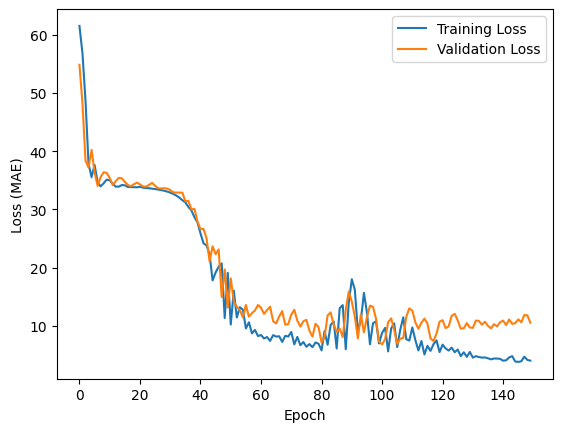

In [107]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

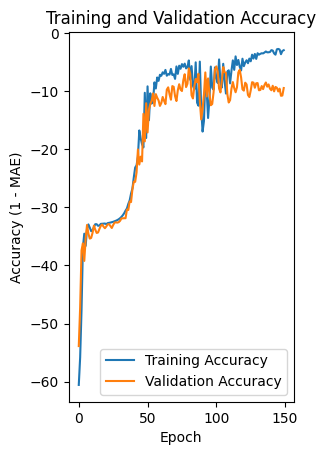

In [108]:
# Plot accuracy graph (using MAE as an inverse measure of accuracy)
plt.subplot(1, 2, 2)
plt.plot(1 - np.array(history.history['loss']), label='Training Accuracy')
plt.plot(1 - np.array(history.history['val_loss']), label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (1 - MAE)')
plt.legend()
plt.title('Training and Validation Accuracy')

In [109]:
# Evaluate the model on the test data
print("\nEvaluating the model on test data...")
predictions = model.predict(test_generator)
true_values = test_labels['value'].values

# Show example predictions
print("\nExample predictions:")
for i in range(10):
    print(f"True value: {true_values[i]}, Predicted value: {predictions[i][0]:.1f}") # nur erste Nachkommastelle

# Flatten the predictions array if needed
# predictions_flat = [pred[0] for pred in predictions]

# Calculate MAE
mae = mean_absolute_error(true_values, predictions)
print(f'\nMean Absolute Error: {mae}\n The models predictions are off by about {mae} units from the actual values.')

# Calculate Coefficient of Determination (R²)
r2 = r2_score(true_values, predictions)
print(f'Coefficient of Determination (R²): {r2} can be explained by the model')


Evaluating the model on test data...
1/1 [==============================] - 0s 232ms/step

Example predictions:
True value: 27.5, Predicted value: 50.1
True value: 17.5, Predicted value: 16.4
True value: 62.5, Predicted value: 62.5
True value: 67.5, Predicted value: 70.1
True value: 40.0, Predicted value: 38.8
True value: 25.0, Predicted value: 47.9
True value: 55.0, Predicted value: 58.5
True value: 70.0, Predicted value: 71.9
True value: 115.0, Predicted value: 117.2
True value: 85.0, Predicted value: 79.2

Mean Absolute Error: 6.377118110656738
 The models predictions are off by about 6.377118110656738 units from the actual values.
Coefficient of Determination (R²): 0.8660276408360508 can be explained by the model
